## Librerías utilizadas

In [834]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import durbin_watson


Leemos el contenido de 'insurance.csv' y vemos las primeras 5 filas

In [835]:
insurace_df = pd.read_csv('insurance.csv')

insurace_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Nos quedamos con las features 'age', 'bmi', 'children' y charges que son las columnas numéricas

In [836]:
insurace_df = insurace_df[['age', 'bmi', 'children', 'charges']]

Chequeamos por valores nulos

In [837]:
insurace_df.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

Chequeamos por duplicados

In [838]:
insurace_df.duplicated().sum()

np.int64(1)

In [839]:
insurace_df.drop_duplicates(inplace=True)
insurace_df.duplicated().sum()

np.int64(0)

Vemos los histogramas y diagramas qqplot para ver como se distribuyen las variables

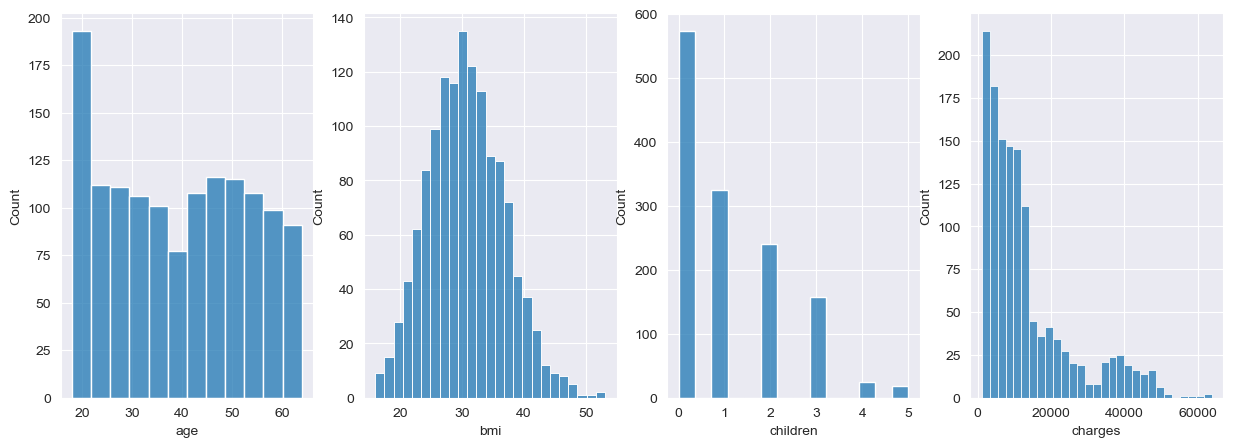

In [840]:
figs, axs = plt.subplots(1, 4, figsize=(15, 5))

sns.histplot(insurace_df['age'], ax=axs[0])
sns.histplot(insurace_df['bmi'], ax=axs[1])
sns.histplot(insurace_df['children'], ax=axs[2])
sns.histplot(insurace_df['charges'], ax=axs[3])

plt.show()

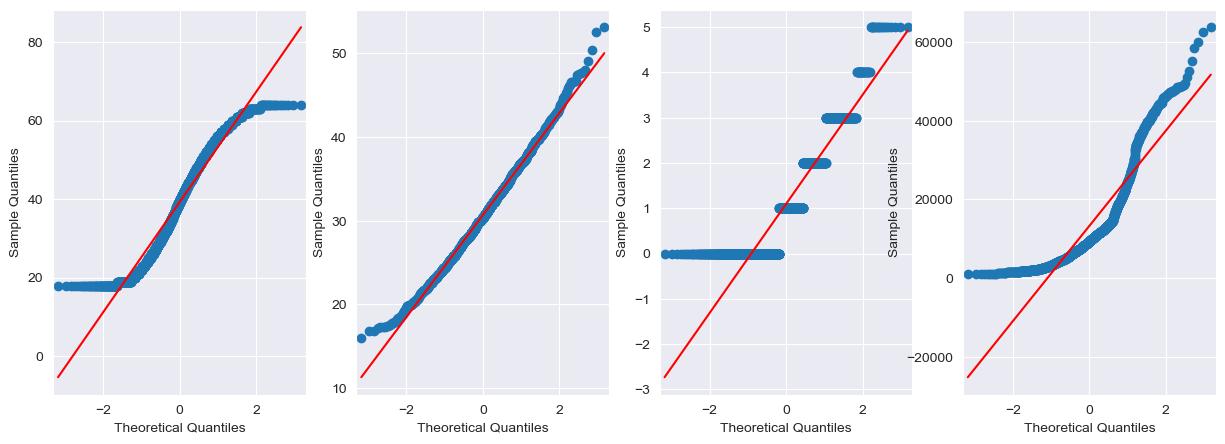

In [841]:
figs, axs = plt.subplots(1, 4, figsize=(15, 5))

qqplot(insurace_df['age'], line='s', ax=axs[0])
qqplot(insurace_df['bmi'], line='s', ax=axs[1])
qqplot(insurace_df['children'], line='s', ax=axs[2])
qqplot(insurace_df['charges'], line='s', ax=axs[3])

plt.show()

Claramente se ve que todas las variables menos 'bmi' no se distribuyen normalmente, por ello usaremos el metodo de Spearman para ver la correlacion entre las variables

Vamos a ver los diagramas de caja y bigotes para ver si hay outliers

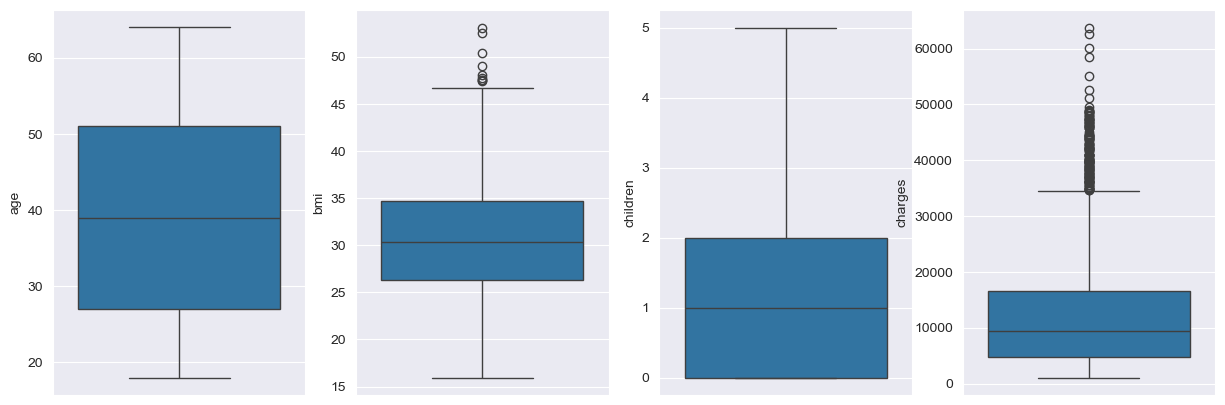

In [842]:
figs, axs = plt.subplots(1, 4, figsize=(15, 5))

sns.boxplot(insurace_df['age'], ax=axs[0])
sns.boxplot(insurace_df['bmi'], ax=axs[1])
sns.boxplot(insurace_df['children'], ax=axs[2])
sns.boxplot(insurace_df['charges'], ax=axs[3])

plt.show()

In [843]:
def count_outliers(df, column, factor=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    # Contar outliers
    outliers_bajo = df[df[column] < lower_bound].shape[0]
    outliers_alto = df[df[column] > upper_bound].shape[0]
    total_outliers = outliers_bajo + outliers_alto

    return outliers_bajo, outliers_alto, total_outliers

outliers_bajo, outliers_alto, total_outliers = count_outliers(insurace_df, 'bmi')
print(f"Outliers en 'bmi a la izquierda': {outliers_bajo}")
print(f"Outliers en 'bmi a la derecha': {outliers_alto}")

outliers_bajo, outliers_alto, total_outliers = count_outliers(insurace_df, 'charges')
print(f"Outliers en 'charges a la izquierda': {outliers_bajo}")
print(f"Outliers en 'charges a la derecha': {outliers_alto}")

Outliers en 'bmi a la izquierda': 0
Outliers en 'bmi a la derecha': 9
Outliers en 'charges a la izquierda': 0
Outliers en 'charges a la derecha': 139


Vemos que hay outliers en 'bmi' y en 'charges', vamos a eliminarlos

In [844]:
def remove_outliers(df, column, side='both', factor=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    if side == 'left':
        return df[df[column] >= lower_bound]
    elif side == 'right':
        return df[df[column] <= upper_bound]
    elif side == 'both':
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        raise ValueError("El parámetro 'side' debe ser 'left', 'right' o 'both'.")


insurace_df = remove_outliers(insurace_df, 'bmi', side='right', factor=1.35)
insurace_df = remove_outliers(insurace_df, 'charges', side='right', factor=0.57)

outliers_bajo, outliers_alto, total_outliers = count_outliers(insurace_df, 'bmi')
print(f"Outliers en 'bmi a la izquierda': {outliers_bajo}")
print(f"Outliers en 'bmi a la derecha': {outliers_alto}")

outliers_bajo, outliers_alto, total_outliers = count_outliers(insurace_df, 'charges')
print(f"Outliers en 'charges a la izquierda': {outliers_bajo}")
print(f"Outliers en 'charges a la derecha': {outliers_alto}")

Outliers en 'bmi a la izquierda': 0
Outliers en 'bmi a la derecha': 0
Outliers en 'charges a la izquierda': 0
Outliers en 'charges a la derecha': 0


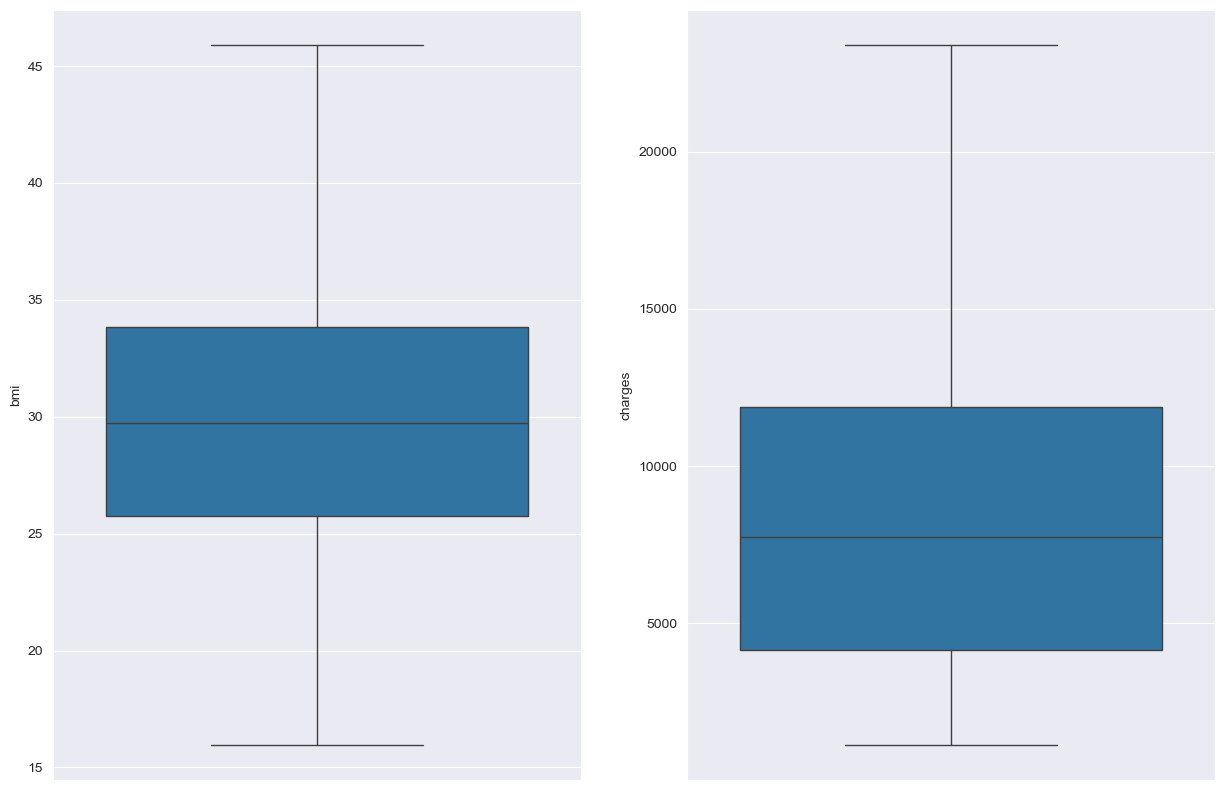

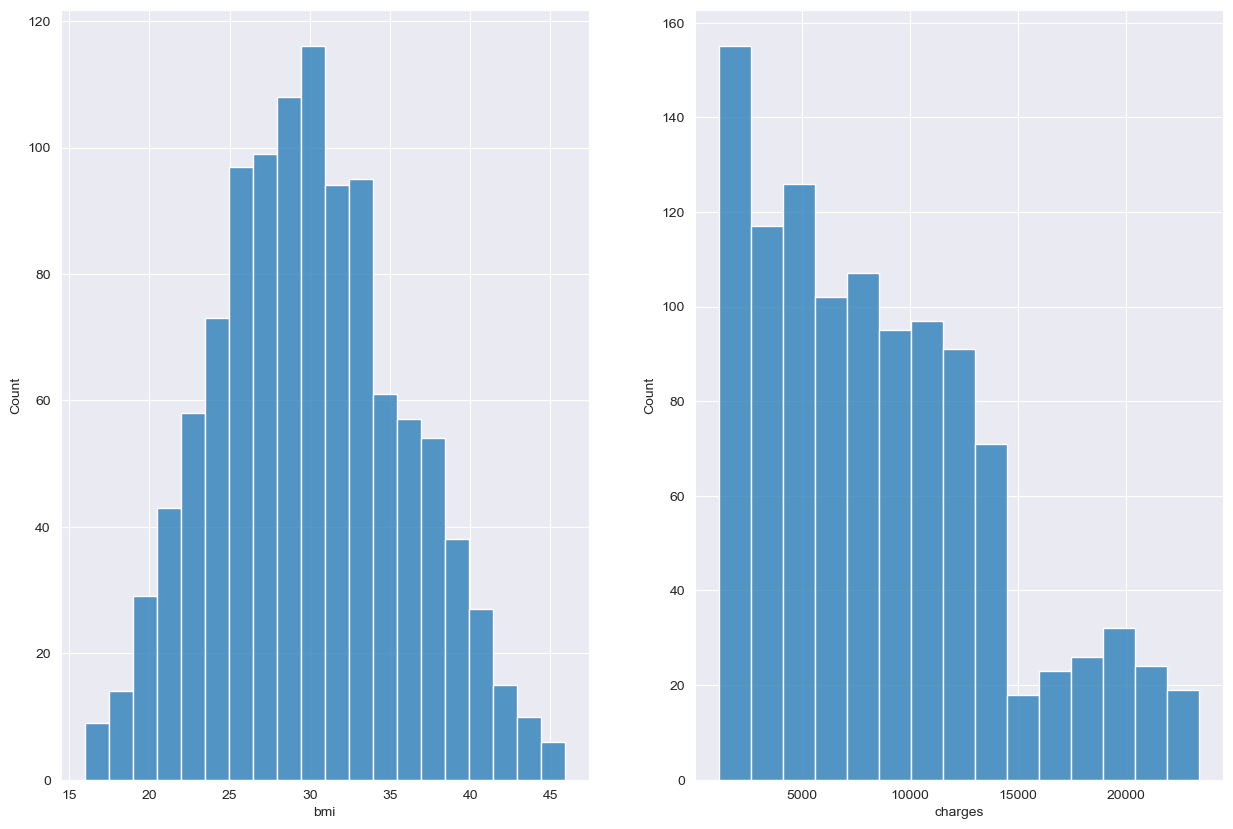

age         1103
bmi         1103
children    1103
charges     1103
dtype: int64

In [845]:
figs, axs = plt.subplots(1, 2, figsize=(15, 10))

sns.boxplot(insurace_df['bmi'], ax=axs[0])
sns.boxplot(insurace_df['charges'], ax=axs[1])

figs, axs = plt.subplots(1, 2, figsize=(15, 10))
sns.histplot(insurace_df['bmi'], ax=axs[0])
sns.histplot(insurace_df['charges'], ax=axs[1])

plt.show()

insurace_df.count()

Analizamos como se correlacionan entre sí estas variables

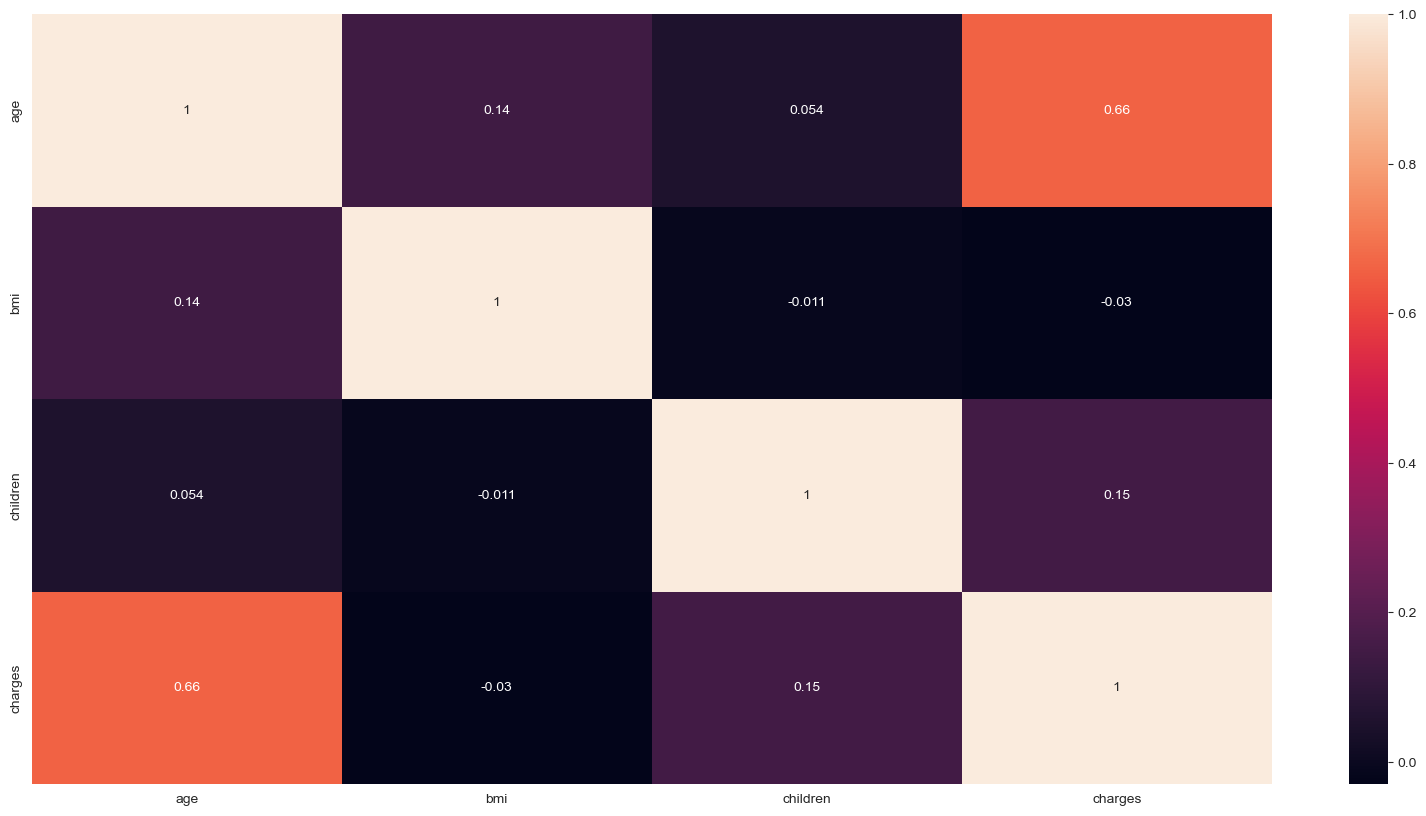

In [846]:
plt.figure(figsize=(20, 10))
sns.heatmap(insurace_df.corr(method="spearman"), annot=True)
plt.show()

Nos quedamos con las variable 'age' que es la que mejor se correlaciona con 'charges'

In [847]:
insurace_df = insurace_df[['age', 'charges']]

Vemos la relación entre 'age' y 'charges'

<Axes: xlabel='age', ylabel='charges'>

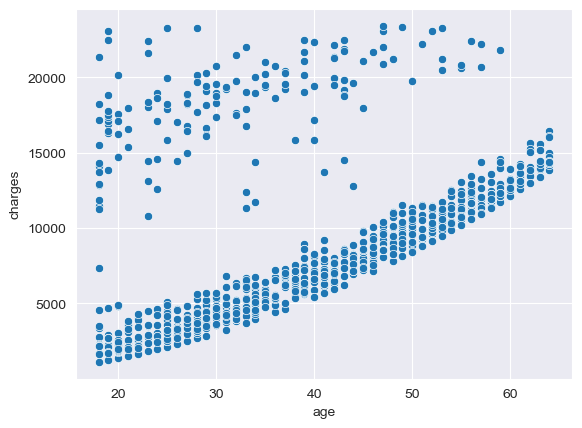

In [848]:
sns.scatterplot(x='age', y='charges', data=insurace_df) 

Vamos a hacer una regresión lineal simple para predecir 'charges' a partir de 'age'

Dividimos los datos en train y test

In [849]:
X = insurace_df['age']
y = insurace_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creamos el modelo de regresión lineal con OLS

In [850]:
linear_model = sm.OLS(y_train, X_train).fit()

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")

Linear Regression MSE: 20055849.626440212
Linear Regression R2: 0.20734207169042995


Vamos a plotear las predicciones de la regresión lineal contra los valores reales

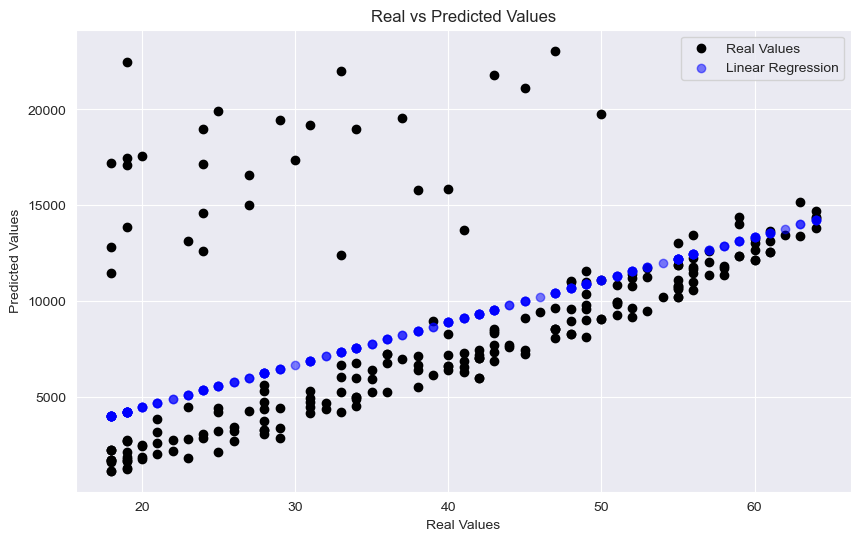

In [851]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='black', label='Real Values')

plt.scatter(X_test, y_pred_linear, color='blue', alpha=0.5, label='Linear Regression')

plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

In [852]:
residuos = linear_model.resid

durbin_watson(residuos)

np.float64(2.0332835213758007)

Text(0.5, 0, 'Predicciones')

<Figure size 1000x800 with 0 Axes>

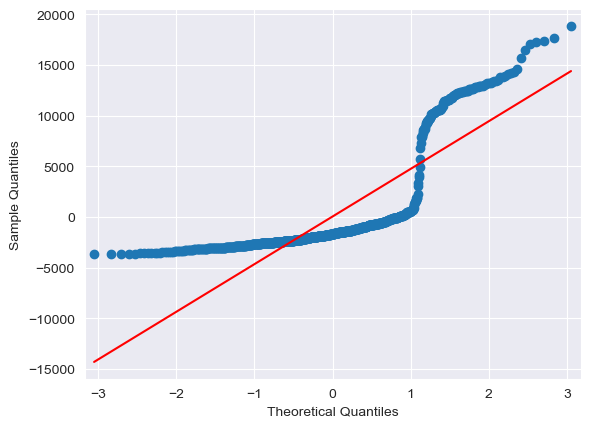

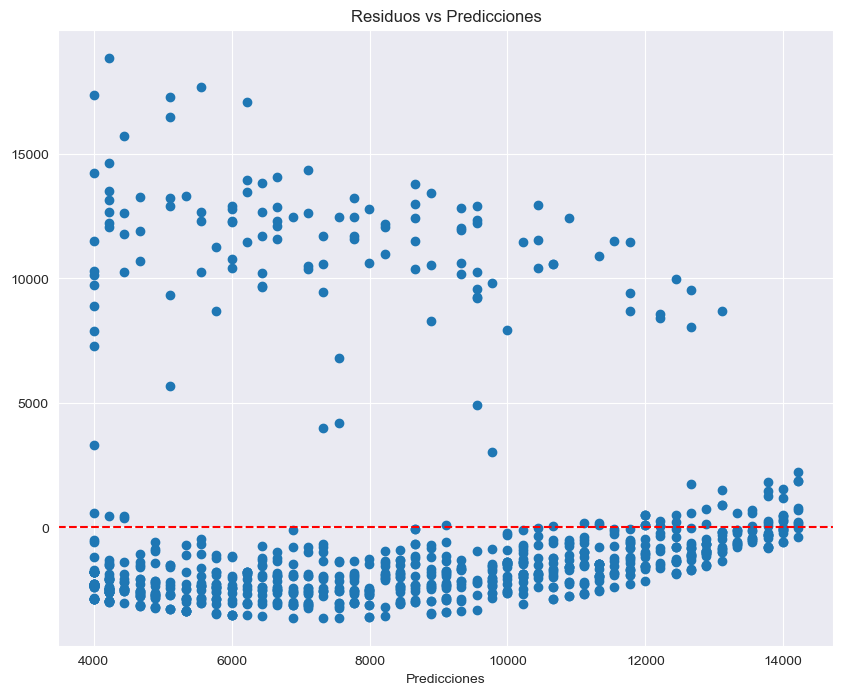

In [853]:
plt.figure(figsize=(10, 8))
sm.qqplot(residuos, line='s')

y_pred = linear_model.predict(X_train)

plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones')
plt.xlabel('Predicciones')

Ahora vamos a hacer una regresion con SVM

In [854]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train.values.reshape(-1, 1), y_train)

y_pred_svr = svr_model.predict(X_test.values.reshape(-1, 1))

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR MSE: {mse_svr}")
print(f"SVR R2: {r2_svr}")

SVR MSE: 25796107.037214123
SVR R2: -0.019527426831797978


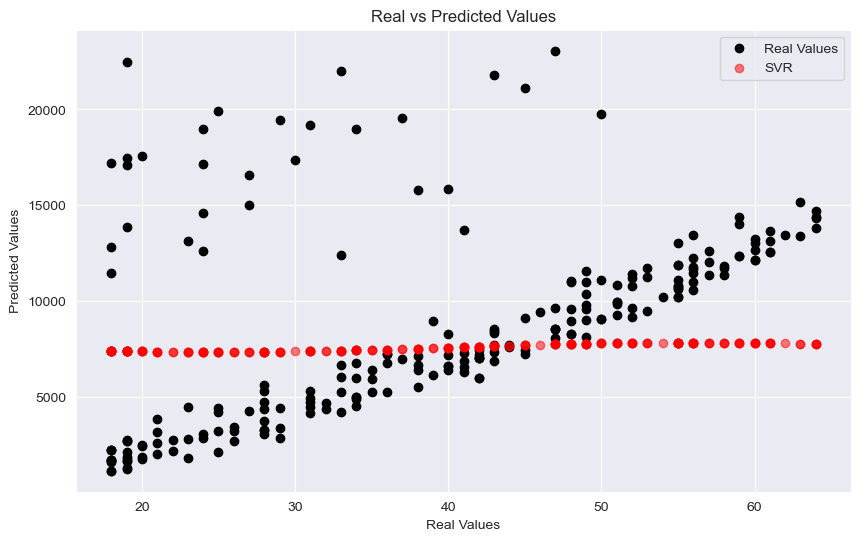

In [855]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='black', label='Real Values')

plt.scatter(X_test, y_pred_svr, color='red', alpha=0.5, label='SVR')

plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

Se puede concluir que para prededir 'charges' a partir de 'age' es mejor usar una regresión lineal simple que una regresión con SVM